In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\RAVITEJA.P\Downloads\churn-bigml-80.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [3]:
df.columns
df.shape


(2666, 20)

In [4]:
df.info

<bound method DataFrame.info of      State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total d

In [5]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
df['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

In [7]:
df.groupby('Churn')['Customer service calls'].mean()

Churn
False    1.453029
True     2.206186
Name: Customer service calls, dtype: float64

In [8]:
df.groupby('Churn')['Total day charge'].mean()

Churn
False    29.768266
True     34.881340
Name: Total day charge, dtype: float64

In [9]:
df.groupby('Churn')['Total intl charge'].mean()

Churn
False    2.737709
True     2.921727
Name: Total intl charge, dtype: float64

In [10]:
df.groupby('Churn')['Account length'].mean()

Churn
False    100.330992
True     102.319588
Name: Account length, dtype: float64

In [11]:
df['Churn'].value_counts(normalize=True)*100

Churn
False    85.446362
True     14.553638
Name: proportion, dtype: float64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Churn Destribution

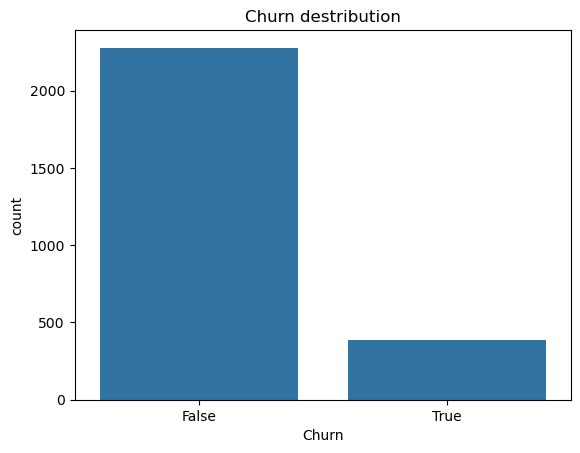

In [14]:
sns.countplot(x='Churn',data=df)
plt.title('Churn destribution')
plt.show()

In [15]:
#Customer sevies calls vs Churn

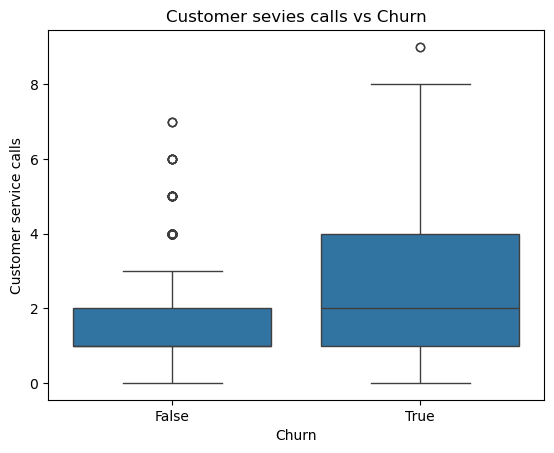

In [16]:
sns.boxplot(x='Churn',y='Customer service calls',data=df)
plt.title('Customer sevies calls vs Churn')
plt.show()

In [17]:
#international call vs churn

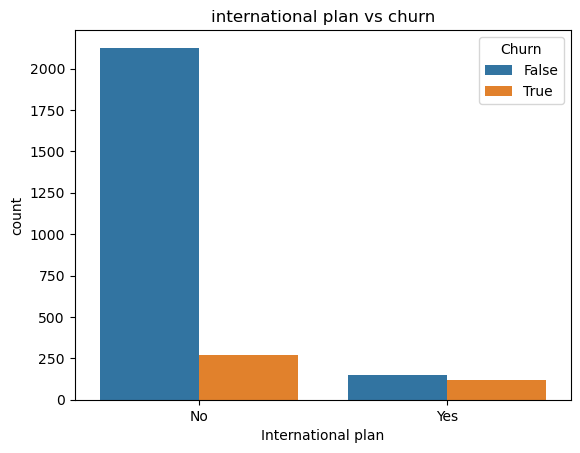

In [18]:
sns.countplot(x='International plan',hue='Churn',data=df)
plt.title('international plan vs churn')
plt.show()

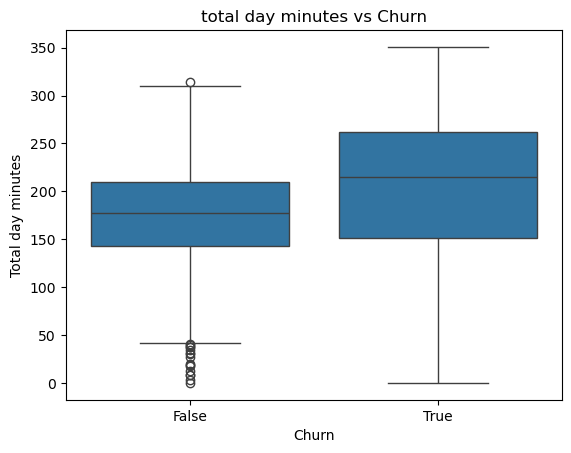

In [19]:
#Usage Behavior vs Churn
sns.boxplot(x='Churn',y='Total day minutes',data=df)
plt.title('total day minutes vs Churn')
plt.show()

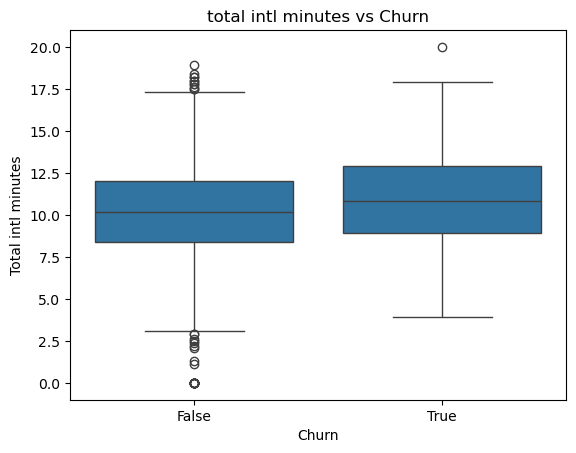

In [20]:
sns.boxplot(x='Churn',y='Total intl minutes',data=df)
plt.title('total intl minutes vs Churn')
plt.show()

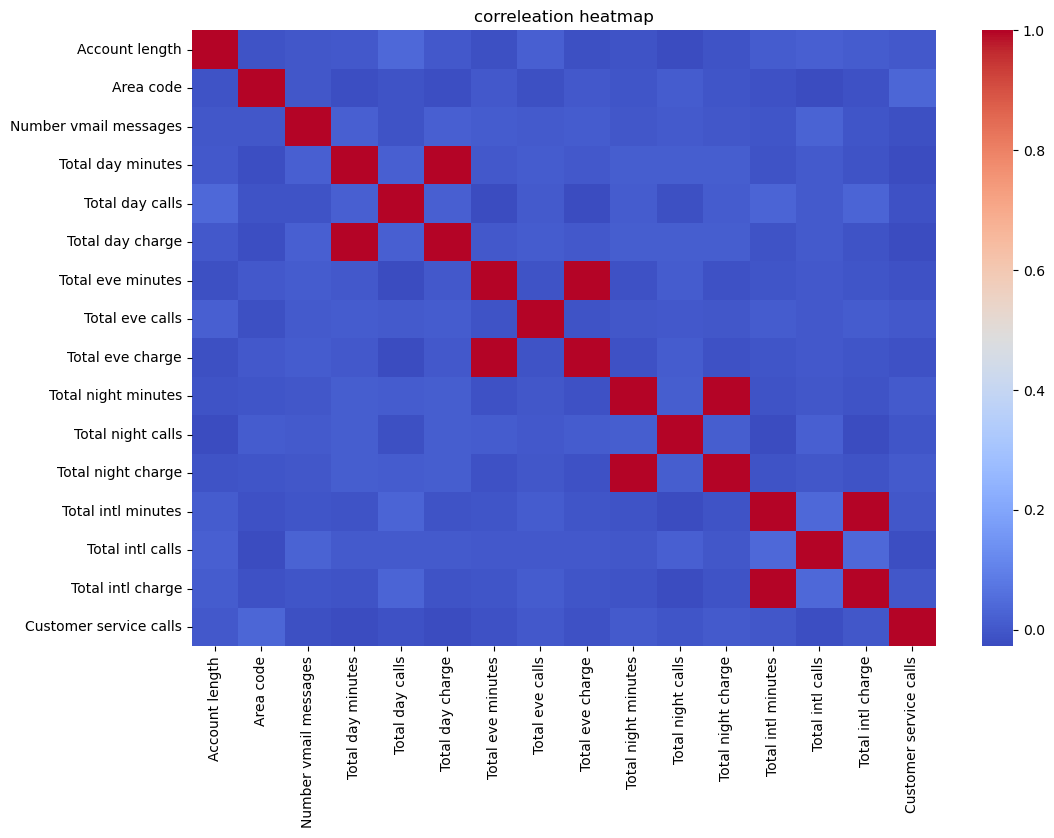

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(),cmap='coolwarm')
plt.title('correleation heatmap')
plt.show()

In [22]:
df_fe=df.copy()

In [23]:
binary_col=['International plan', 'Voice mail plan', 'Churn']
for col in binary_col:
    df_fe[col]=df_fe[col].map({'yes':1,'no':0})

In [24]:
charge_cols = [
    'Total day charge',
    'Total eve charge',
    'Total night charge',
    'Total intl charge'
]
df_fe.drop(columns=charge_cols,inplace=True)

In [25]:
df_fe['Total_usage_minutes'] = (
    df_fe['Total day minutes'] +
    df_fe['Total eve minutes'] +
    df_fe['Total night minutes'] +
    df_fe['Total intl minutes']
)

In [26]:
df_fe['High_service_calls'] = (df_fe['Customer service calls'] >= 4).astype(int)


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_fe['State'] = le.fit_transform(df_fe['State'])


In [28]:
X = df_fe.drop('Churn', axis=1)
y = df_fe['Churn']


In [29]:
X.shape, y.shape


((2666, 17), (2666,))

In [31]:
df_fe['Churn'] = df_fe['Churn'].map({'Yes': 1, 'No': 0})

In [32]:
df_fe['Churn'].isnull().sum()

np.int64(2666)

In [33]:
df['Churn'].value_counts()


Churn
False    2278
True      388
Name: count, dtype: int64

In [34]:
df_fe['Churn'] = df['Churn'].astype(str).str.strip().map({
    'Yes': 1,
    'No': 0,
    'True': 1,
    'False': 0
})

In [35]:
df_fe['Churn'].isnull().sum()
df_fe['Churn'].value_counts()

Churn
0    2278
1     388
Name: count, dtype: int64

In [36]:
X = df_fe.drop('Churn', axis=1)
y = df_fe['Churn']


In [37]:
y.isnull().sum()

np.int64(0)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\RAVITEJA.P\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\RAVITEJA.P\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\RAVITEJA.P\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


In [43]:
log_reg_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # handles NaNs
    ('scaler', StandardScaler()),                    # scaling
    ('model', LogisticRegression(max_iter=1000))
])


In [44]:
log_reg_pipeline.fit(X_train, y_train)


C:\Users\RAVITEJA.P\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['International plan' 'Voice mail plan']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [45]:
y_pred_lr = log_reg_pipeline.predict(X_test)
y_prob_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("LOGISTIC REGRESSION RESULTS")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


LOGISTIC REGRESSION RESULTS
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       456
           1       0.32      0.14      0.20        78

    accuracy                           0.83       534
   macro avg       0.59      0.55      0.55       534
weighted avg       0.79      0.83      0.80       534

ROC-AUC: 0.747385290148448


C:\Users\RAVITEJA.P\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['International plan' 'Voice mail plan']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\RAVITEJA.P\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['International plan' 'Voice mail plan']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [46]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   -------------------------------------- - 524.3/549.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 549.1/549.1 kB 1.3 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


In [47]:
import shap
import numpy as np

In [48]:
# extract processed training data
X_train_processed = log_reg_pipeline.named_steps['imputer'].transform(X_train)
X_train_processed = log_reg_pipeline.named_steps['scaler'].transform(X_train_processed)


C:\Users\RAVITEJA.P\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['International plan' 'Voice mail plan']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [49]:
explainer = shap.Explainer(
    log_reg_pipeline.named_steps['model'],
    X_train_processed,
    feature_names=X.columns
)


In [50]:
shap_values = explainer(X_train_processed)


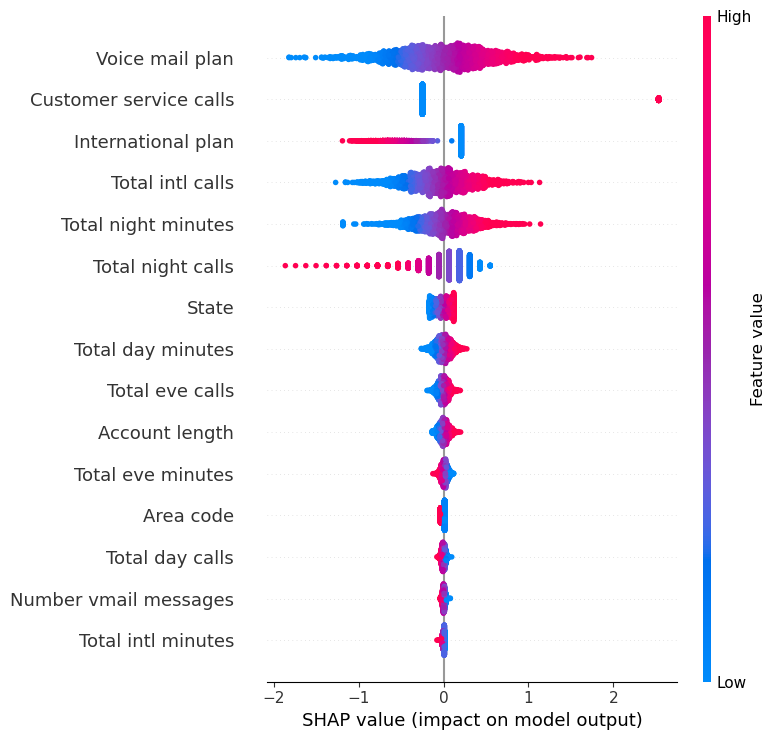

In [51]:
shap.summary_plot(shap_values, X_train_processed, feature_names=X.columns)


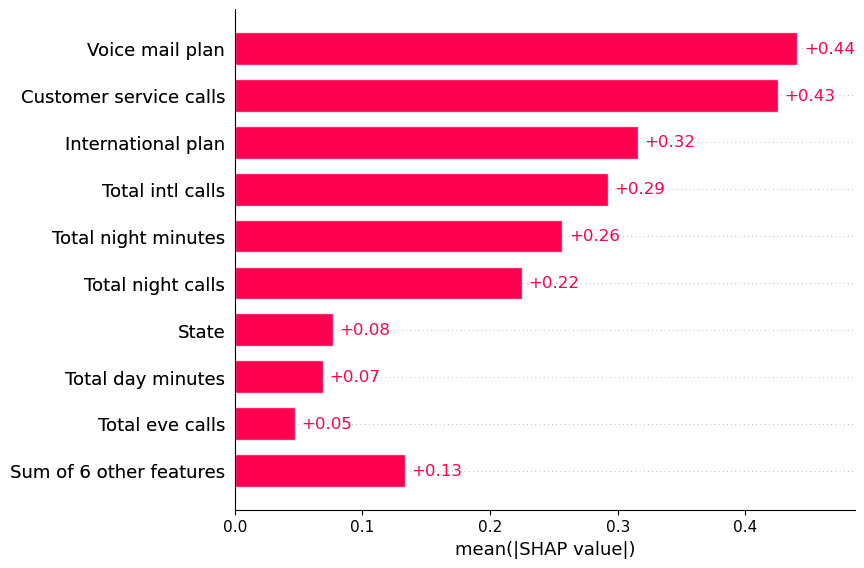

In [52]:
shap.plots.bar(shap_values)


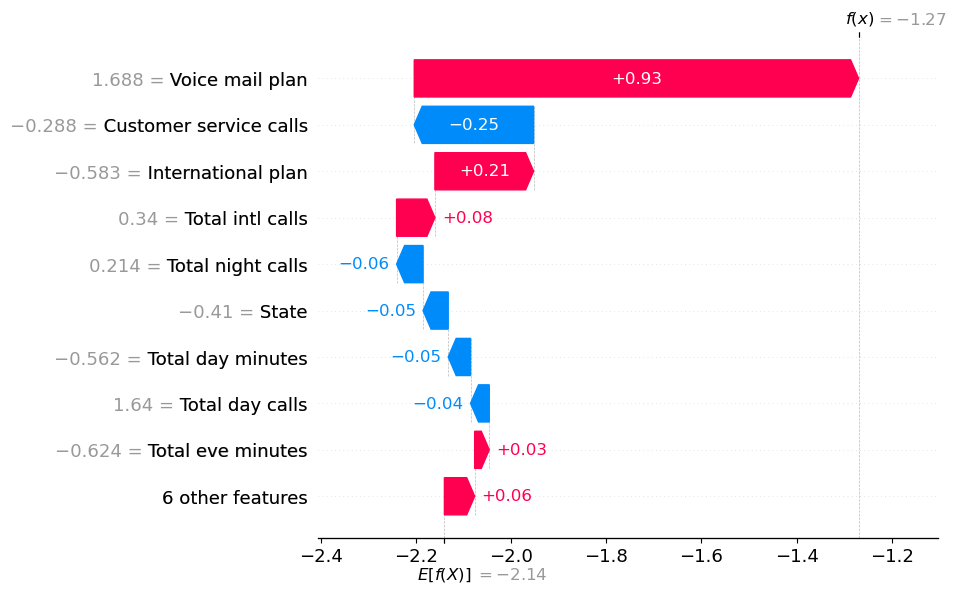

In [53]:
# explain one customer
shap.plots.waterfall(shap_values[0])
